In [1]:
import pandas as pd


trace = pd.read_csv("acol_trace.txt", sep="\t")

which_variable = "species_log_nu_36"

In [2]:
trace

,gamma_1,gamma_2,molecules_mean_log_nu,molecules_var_log_nu,molecules_log_nu_1,molecules_log_nu_2,molecules_log_nu_3,molecules_log_nu_4,molecules_log_nu_5,molecules_log_nu_6,...,species_alpha_27,species_alpha_28,species_alpha_29,species_alpha_30,species_alpha_31,species_alpha_32,species_alpha_33,species_alpha_34,species_alpha_35,species_alpha_36
0,0.001000,0.000000,0.5,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
1,0.051959,0.110873,0.5,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
2,0.026406,0.226433,0.5,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
3,0.203877,0.174719,0.5,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
4,0.099743,0.092855,0.5,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,55386.700000,21270.000000,0.5,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
10997,56011.900000,21159.500000,0.5,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
10998,55954.200000,20969.800000,0.5,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
10999,56355.700000,21435.500000,0.5,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4


In [3]:
print(trace[which_variable].mean())
print(trace[which_variable].var())

0.5456288763350241
0.1770285427810828


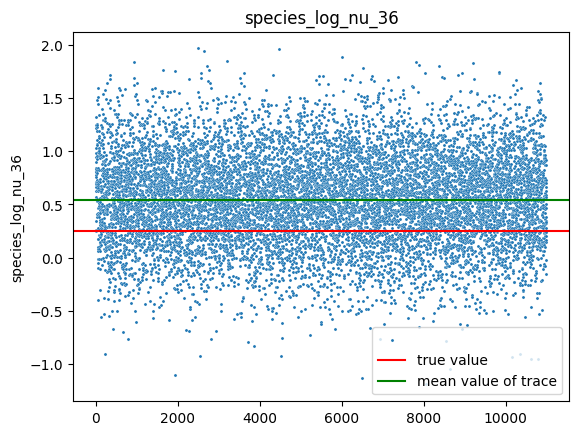

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=trace, y=which_variable, x=range(len(trace)), s=5).set_title(
    which_variable
)
plt.axhline(y=trace[which_variable][0], color="red")
plt.axhline(y=trace[which_variable].mean(), color="green")
plt.legend(["", "true value", "mean value of trace"])